In [1]:
import ROOT
import sys
import os
import numpy as np
from ROOT import TCanvas, TColor, TGaxis, TH1F, TPad
from ROOT import kBlack, kBlue, kRed

Welcome to JupyROOT 6.20/06


In [2]:
stack_i = ROOT.THStack("", "")
ROOT.gROOT.SetBatch()
ROOT.gStyle.SetOptStat(0)

In [3]:
infile = ROOT.TFile("/eos/user/s/sraj/M.Sc._Thesis/Plot_M.Sc._thesis/Final_training/MyrootFile_test_with_weight_after_testing_on_training_Tprime_600-700_all_five_background.root"," READ ")
infile.ls();

TFile**		/eos/user/s/sraj/M.Sc._Thesis/Plot_M.Sc._thesis/Final_training/MyrootFile_test_with_weight_after_testing_on_training_Tprime_600-700_all_five_background.root	
 TFile*		/eos/user/s/sraj/M.Sc._Thesis/Plot_M.Sc._thesis/Final_training/MyrootFile_test_with_weight_after_testing_on_training_Tprime_600-700_all_five_background.root	
  KEY: TH1D	datafile;1	datafile
  KEY: TH1D	ttgg;1	ttgg
  KEY: TH1D	ttjets;1	ttjets
  KEY: TH1D	diphotongamma;1	diphotongamma
  KEY: TH1D	gjets;1	gjets
  KEY: TH1D	ttgjets;1	ttgjets
  KEY: TH1D	Tprime_600;1	Tprime_600
  KEY: TH1D	Tprime_700;1	Tprime_700
  KEY: TH1D	SMHiggs;1	SMHiggs


In [4]:
hist_data = infile.Get("datafile")
hist_1 = infile.Get("ttgg")
hist_2 = infile.Get("ttjets")
hist_3 = infile.Get("diphotongamma")
hist_4 = infile.Get("gjets")
hist_5 = infile.Get("ttgjets")
hist_6 = infile.Get("Tprime_600")
hist_7 = infile.Get("Tprime_700")
hist_8 = infile.Get("SMHiggs")

In [5]:
c1 = ROOT.TCanvas("c1", "",600,600)
h1 = ROOT.TH1D("h1", "h1", 40, 0, 1)
totalMC= ROOT.TH1D("totalMC", "Events;DNN score;",40,0,1)


In [6]:
h1.Add(hist_data)
h1.SetMarkerStyle(20)
h1.SetMarkerSize(1)
h1.SetMarkerColor(1)
h1.SetLineWidth(1)
h1.SetLineColor(1)

totalMC.Add(hist_1)
totalMC.Add(hist_2)
totalMC.Add(hist_3)
totalMC.Add(hist_4)
totalMC.Add(hist_5)
# totalMC.Add(hist_8)
totalMCYield=totalMC.Integral()
DataYield= h1.Integral()
DataMC_scaleF=DataYield/totalMCYield  

In [7]:
hist_1.Scale(DataMC_scaleF)
hist_2.Scale(DataMC_scaleF)
hist_3.Scale(DataMC_scaleF)
hist_4.Scale(DataMC_scaleF)
hist_5.Scale(DataMC_scaleF)
hist_6.Scale(DataMC_scaleF)
hist_7.Scale(DataMC_scaleF)
hist_8.Scale(DataMC_scaleF)

In [8]:
hist_1.SetFillColor(32)
hist_2.SetFillColor(49)
hist_3.SetFillColor(39)
hist_4.SetFillColor(4)
hist_5.SetFillColor(46)
hist_8.SetFillColor(41)

Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 4 points have been skipped


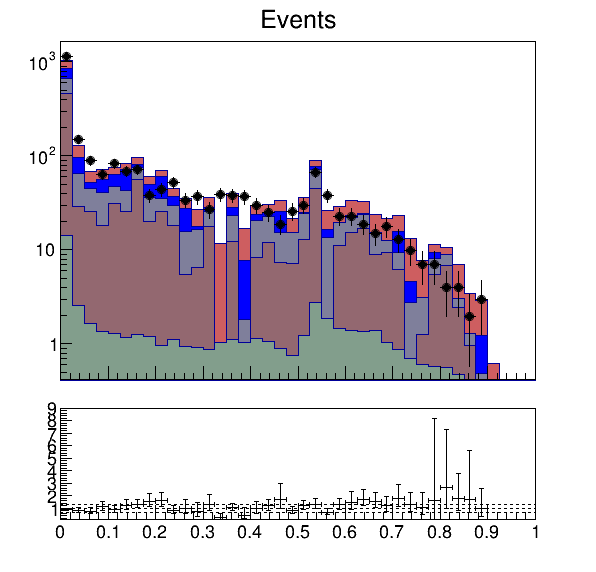

In [9]:
# stack_i.Add(hist_0)
# hist_0.SetFillColor(7)
stack_i.Add(hist_1)
stack_i.Add(hist_2)
stack_i.Add(hist_3)
stack_i.Add(hist_4)
stack_i.Add(hist_5)
# stack_i.Add(hist_8)

hist_6.Scale(500)
hist_7.Scale(500)

legend = ROOT.TLegend()

hist_6.SetLineWidth(2)
hist_6.SetLineColor(1)
hist_7.SetLineWidth(2)
hist_7.SetLineColor(2)

legend = ROOT.TLegend(0.30,0.7,0.8,0.9)
legend.SetNColumns(3)
legend.AddEntry(hist_data)
legend.AddEntry(hist_1)
legend.AddEntry(hist_2)
legend.AddEntry(hist_3)
legend.AddEntry(hist_4)
legend.AddEntry(hist_5)

stack_i.Draw("hist")
hist_6.Draw("SAME hist")
hist_7.Draw("SAME hist")
legend.AddEntry(hist_6)
legend.AddEntry(hist_7)
hist_data.Draw("E0 x0 SAME")

rp = ROOT.TRatioPlot(stack_i,h1)
# rp.GetLowYaxis().SetNdivisions(1000)
# rp.GetLowerRefYaxis().SetRangeUser(0,2)

tex1 = ROOT.TLatex(0.10, 0.95, "#bf{CMS} #it{Simulation Premilinary}")
tex1.SetNDC()
tex1.SetTextAlign(13)
tex1.SetTextFont(42)
tex1.SetTextSize(0.04)
tex1.SetLineWidth(2)

tex2 = ROOT.TLatex(0.71, 0.95, "3000 fb^{-1} (14 TeV)")
tex2.SetNDC()
tex2.SetTextAlign(13)
tex2.SetTextFont(42)
tex2.SetTextSize(0.04)
tex2.SetLineWidth(2)




tex1.Draw()
tex2.Draw()
totalMC.SetTitle("Events")
totalMC.SetMaximum(2)
totalMC.Draw()
c1.SetLogy()
legend.Draw()
rp.Draw()
c1.Draw()

In [ ]:
# from ROOT import gROOT 
# gROOT.GetListOfCanvases().Draw()